In [1]:
import pandas as pd
import numpy as np
import math
import os
from tqdm import tqdm
from matplotlib import pyplot as plt
from PyRadioLoc.Utils.GeoUtils import GeoUtils
%run UtilsLightGBMFingerPrinting.ipynb
%run Imports.ipynb
# gera os resultados teoricos
# k = 5 range(0,5)
# k = 10 range(0,10)
for i in range(0,5):
    FILES = [
        (3*i + 28,'./k-fold-LightGBM/Test-LightGBM-Outdoor-Fold'+str(i+1)+'.csv'), # Usar CDB_20_LightGBM_Complete_k-fold 
        (3*i + 29,'./k-fold-LightGBM/Indoor_Test.csv'), # Usar CDB_20_LightGBM_Complete_k-fold
        #(3*i + 29,'./k-fold-LightGBM/Indoor_Test_k_fold10.csv'), # Usar CDB_20_LightGBM_Complete_k-fold
        (3*i + 30,'./k-fold-LightGBM/Test-LightGBM-Indoor-Outdoor-Fold'+str(i+1)+'.csv') # Usar CDB_20_LightGBM_Complete_k-fold
        ]
    TEST_DATABASE = "./k-fold-LightGBM/CDB-Fold"+str(i+1)+"-LightGBM.csv"
    #TEST_DATABASE = "./CDB/CDB_20_LightGBM_Complete.csv"
    generate_theorical_results(FILES, TEST_DATABASE)
FILES = [
    
    #k = 1 LightGBM
    './FinalResult/Resultados_Metodo_28.csv',  # CDB gerado com LightGBM dados Outdoor
    './FinalResult/Resultados_Metodo_29.csv',  # CDB gerado com LightGBM dados Indoor
    './FinalResult/Resultados_Metodo_30.csv',  # CDB gerado com LightGBM dados Indoor-Outdoor
    
    #k = 2 LightGBM
    './FinalResult/Resultados_Metodo_31.csv',  # CDB gerado com LightGBM dados Outdoor
    './FinalResult/Resultados_Metodo_32.csv',  # CDB gerado com LightGBM dados Indoor
    './FinalResult/Resultados_Metodo_33.csv',  # CDB gerado com LightGBM dados Indoor-Outdoor
    
    #k = 3 LightGBM
    './FinalResult/Resultados_Metodo_34.csv',  # CDB gerado com LightGBM dados Outdoor
    './FinalResult/Resultados_Metodo_35.csv',  # CDB gerado com LightGBM dados Indoor
    './FinalResult/Resultados_Metodo_36.csv',  # CDB gerado com LightGBM dados Indoor-Outdoor
    
    #k = 4 LightGBM
    './FinalResult/Resultados_Metodo_37.csv',  # CDB gerado com LightGBM dados Outdoor
    './FinalResult/Resultados_Metodo_38.csv',  # CDB gerado com LightGBM dados Indoor
    './FinalResult/Resultados_Metodo_39.csv',  # CDB gerado com LightGBM dados Indoor-Outdoor
    
    #k = 5 LightGBM
    './FinalResult/Resultados_Metodo_40.csv',  # CDB gerado com LightGBM dados Outdoor
    './FinalResult/Resultados_Metodo_41.csv',  # CDB gerado com LightGBM dados Indoor
    './FinalResult/Resultados_Metodo_42.csv',  # CDB gerado com LightGBM dados Indoor-Outdoor
    
]
METHODS = [x.split("_")[-1].split(".")[0] for x in FILES]     # lista contendo os metodos que serão usados
db = pd.read_csv('databases/meds_pandas.csv')
erbs = pd.read_csv('databases/Bts.csv')
#errorLocation = pd.read_csv('result/erros.csv')
ERROS_CSV_FILE = './result-k-fold/erros-LightGBM-k-fold.csv' 

400it [00:29, 13.59it/s]
400it [00:25, 15.39it/s]
400it [00:27, 14.64it/s]
400it [00:28, 12.27it/s]
400it [00:23, 16.74it/s]
400it [00:24, 18.43it/s]
400it [00:25, 16.21it/s]
400it [00:23, 17.33it/s]
400it [00:24, 16.36it/s]
400it [00:24, 15.67it/s]
400it [00:22, 17.51it/s]
400it [00:23, 20.31it/s]
400it [00:25,  9.22it/s]
400it [00:24, 16.57it/s]
400it [00:25, 18.52it/s]


In [2]:
# Gera o dataframe contendo os erros
errors_df = calculate_theorical_errors()
round(errors_df.describe(), 2)

,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
count,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00
mean,39.62,74.26,56.55,38.48,70.11,54.64,37.48,73.45,54.62,36.69,92.42,64.17,41.26,72.70,52.70
std,37.46,28.34,36.46,34.66,24.80,33.12,36.72,21.61,32.50,32.44,22.91,40.59,37.86,28.27,34.44
min,0.90,21.40,1.19,2.25,21.40,3.00,0.44,30.28,0.86,0.74,39.63,1.94,0.66,21.40,0.65
25%,13.07,59.28,21.72,14.63,59.28,23.02,13.36,61.21,26.92,13.21,77.44,24.64,15.74,59.28,21.40
50%,26.26,78.90,59.28,27.22,72.88,59.28,26.38,81.69,55.81,25.63,87.04,72.18,28.21,72.88,57.72
75%,55.08,93.25,83.90,50.09,83.90,81.69,46.14,83.07,81.69,50.02,112.33,101.15,55.39,83.90,81.69
max,233.14,143.38,256.59,229.28,125.79,154.27,225.80,116.27,167.41,192.17,137.37,197.94,211.34,176.09,215.46


In [3]:
test_erro = round(errors_df.describe(), 2)
test_erros = errors_df

In [4]:
std_outdoor = (test_erros['28'].std() + test_erros['31'].std() + test_erros['34'].std() + test_erros['37'].std() + test_erros['40'].std())/5
std_outdoor

35.82685161603274

In [5]:
std_indoor = (test_erros['29'].std() + test_erros['32'].std() + test_erros['35'].std() + test_erros['38'].std() + test_erros['41'].std())/5
std_indoor

25.18632789534093

In [6]:
std_outdoor_indoor = (test_erros['30'].std() + test_erros['33'].std() + test_erros['36'].std() + test_erros['39'].std() + test_erros['42'].std())/5
std_outdoor_indoor

35.42127816560884

# LightGBM-Outdoor:

In [7]:
#+ test_erros['43'] + test_erros['46'] + test_erros['49'] + test_erros['52'] + test_erros['55']
#+ test_erros['44'] + test_erros['47'] + test_erros['50'] + test_erros['53'] + test_erros['56']
#+ test_erros['45'] + test_erros['48'] + test_erros['51'] + test_erros['54'] + test_erros['57']

In [8]:
k = 5

test_erro = round(errors_df.describe(), 2)
test_erros = errors_df
mean_outdoor = (test_erros['28'] + test_erros['31'] + test_erros['34'] + test_erros['37'] + test_erros['40'])/k
#mean_outdoor.head()
min_outdoor = min(test_erro['28']['min'], test_erro['31']['min'], test_erro['34']['min'], test_erro['37']['min'], test_erro['40']['min'])
#min_outdoor
max_outdoor = max(test_erro['28']['max'], test_erro['31']['max'], test_erro['34']['max'], test_erro['37']['max'], test_erro['40']['max'])
#max_outdoor
mean_indoor = (test_erros['29'] + test_erros['32'] + test_erros['35'] + test_erros['38'] + test_erros['41'])/k
#mean_indoor.head()
min_indoor = min(test_erro['29']['min'], test_erro['32']['min'], test_erro['35']['min'], test_erro['38']['min'], test_erro['41']['min'])
#min_outdoor
max_indoor = max(test_erro['29']['max'], test_erro['32']['max'], test_erro['35']['max'], test_erro['38']['max'], test_erro['41']['max'])
#max_outdoor
mean_indoor_outdoor = (test_erros['30'] + test_erros['33'] + test_erros['36'] + test_erros['39'] + test_erros['42'])/k
#mean_indoor_outdoor.head()
min_indoor_outdoor = min(test_erro['30']['min'], test_erro['33']['min'], test_erro['36']['min'], test_erro['39']['min'], test_erro['42']['min'])
#min_outdoor
max_indoor_outdoor = max(test_erro['30']['max'], test_erro['33']['max'], test_erro['36']['max'], test_erro['39']['max'], test_erro['42']['max'])
#max_outdoor
erros_LightGBM = [mean_outdoor,mean_indoor, mean_indoor_outdoor ]
erros_LightGBM = pd.DataFrame(erros_LightGBM)
erros_LightGBM = erros_LightGBM.T
erros_LightGBM = round(erros_LightGBM,2)
erros_LightGBM.to_csv(ERROS_CSV_FILE, index=False)
erros_LightGBM.head()

,0,1,2
0,48.39,36.30,36.09
1,20.24,88.86,18.22
2,57.61,70.28,22.19
3,21.25,71.45,46.15
4,47.44,106.48,66.51


In [9]:
max_outdoor

233.14

In [10]:
max_indoor

176.09

In [11]:
max_indoor_outdoor

256.59

In [12]:
min_outdoor

0.44

In [13]:
min_indoor

21.4

In [14]:
min_indoor_outdoor

0.65

In [15]:
#errors_df.to_csv(ERROS_CSV_FILE, index=False)

In [16]:
results_LightGBM = round(erros_LightGBM.describe(), 2)
results_LightGBM 
#results_LightGBM.to_csv('./result-k-fold/Result-LightGBM-k-fold.csv', index=False)

,0,1,2
count,400.00,400.00,400.00
mean,38.71,76.59,56.54
std,16.70,20.58,25.97
min,8.02,36.30,7.93
25%,25.95,70.28,35.59
50%,36.34,81.43,49.41
75%,49.16,86.60,81.43
max,98.93,124.54,114.73


In [ ]:
#k = 6 LightGBM
'./FinalResult/Resultados_Metodo_43.csv',  # CDB gerado com LightGBM dados Outdoor
'./FinalResult/Resultados_Metodo_44.csv',  # CDB gerado com LightGBM dados Indoor
'./FinalResult/Resultados_Metodo_45.csv',  # CDB gerado com LightGBM dados Indoor-Outdoor

#k = 7 LightGBM
'./FinalResult/Resultados_Metodo_46.csv',  # CDB gerado com LightGBM dados Outdoor
'./FinalResult/Resultados_Metodo_47.csv',  # CDB gerado com LightGBM dados Indoor
'./FinalResult/Resultados_Metodo_48.csv',  # CDB gerado com LightGBM dados Indoor-Outdoor

#k = 8 LightGBM
'./FinalResult/Resultados_Metodo_49.csv',  # CDB gerado com LightGBM dados Outdoor
'./FinalResult/Resultados_Metodo_50.csv',  # CDB gerado com LightGBM dados Indoor
'./FinalResult/Resultados_Metodo_51.csv',  # CDB gerado com LightGBM dados Indoor-Outdoor

#k = 9 LightGBM
'./FinalResult/Resultados_Metodo_52.csv',  # CDB gerado com LightGBM dados Outdoor
'./FinalResult/Resultados_Metodo_53.csv',  # CDB gerado com LightGBM dados Indoor
'./FinalResult/Resultados_Metodo_54.csv',  # CDB gerado com LightGBM dados Indoor-Outdoor

#k = 10 LightGBM
'./FinalResult/Resultados_Metodo_55.csv',  # CDB gerado com LightGBM dados Outdoor
'./FinalResult/Resultados_Metodo_56.csv',  # CDB gerado com LightGBM dados Indoor
'./FinalResult/Resultados_Metodo_57.csv',  # CDB gerado com LightGBM dados Indoor-Outdoor"""

In [4]:
import pandas as pd
import numpy as np
import math
import os
from tqdm import tqdm
from matplotlib import pyplot as plt
from PyRadioLoc.Utils.GeoUtils import GeoUtils
%run UtilsLightGBMFingerPrinting.ipynb
%run Imports.ipynb

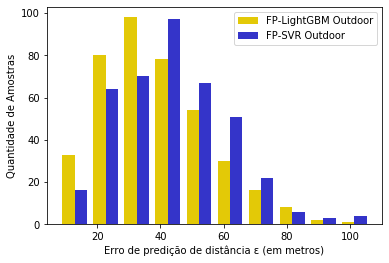

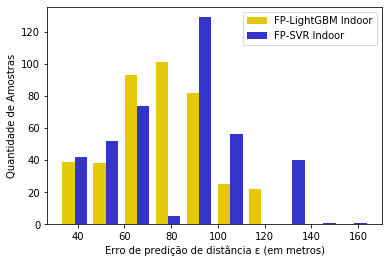

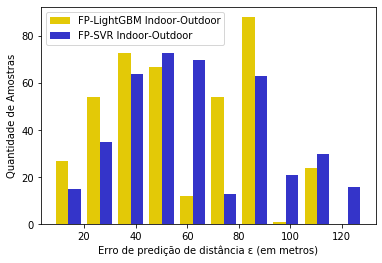

In [5]:

ERROS_CSV_FILE = './result-k-fold/erros-k-fold.csv' 
for i in range(0,3):
    environment = ['Outdoor', 'Indoor', 'Indoor-Outdoor']
    errorLocation = pd.read_csv(ERROS_CSV_FILE)
    score_FP_LightGBM = errorLocation[str(i + 7)]
    score_FP_SVR = errorLocation[str(i + 10)]
    legend = ['FP-LightGBM '+ environment[i], 'FP-SVR '+ environment[i]]
    plt.hist([score_FP_LightGBM, score_FP_SVR], color=['#e3c907', '#3434c9'])
    plt.xlabel("Erro de predição de distância "+chr(949)+" (em metros)")
    plt.ylabel("Quantidade de Amostras")
    plt.legend(legend)
    #plt.xticks(np.arange(0, 200, 20))#Metros
    #plt.yticks(np.arange(0, 180, 30))# Amostras
    plt.savefig('./result-k-fold/'+ environment[i]+'.png')  
    plt.show()